# National Map Full State

In [19]:
%pylab inline
import pyriv
import geopandas as gpd

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /Users/jkibele/Documents/SASAP/sasap-size-declines/RiverDistance/

/Users/jkibele/Documents/SASAP/sasap-size-declines/RiverDistance


In [13]:
natmap_fn = 'data/NatMapGDF.shp'
nm_coastline_fn = 'data/NatMapCoastline3338.shp'

In [14]:
%%time
gb = pyriv.GraphBuilder(natmap_fn, nm_coastline_fn)

Weighting Edges with Distances
CPU times: user 1min 55s, sys: 3.14 s, total: 1min 58s
Wall time: 1min 57s


Graph pruning isn't working right now. I'll have to fix that, but I'll try without pruning for now.

I'm also having that weird problem with the shapefiles so I'll save them with gpd to fix it.

In [15]:
kusk_fn = 'data/positions/kusko_pos.shp'
yuk_fn = 'data/positions/yukon_pos.shp'

In [20]:
kdf = gpd.read_file(kusk_fn)
ydf = gpd.read_file(yuk_fn)
kdf.to_crs({'init' :'epsg:3338'}, inplace=True)
ydf.to_crs({'init' :'epsg:3338'}, inplace=True)

In [21]:
kusk3338fn = 'data/positions/kusko_3338.shp'
yuk3338fn = 'data/positions/yuk_3338.shp'
kdf.to_file(kusk3338fn)
ydf.to_file(yuk3338fn)

In [22]:
%%time
kusk = pyriv.river_distances(kusk3338fn, gb.graph)

CPU times: user 58.2 s, sys: 599 ms, total: 58.8 s
Wall time: 58.8 s


In [30]:
kusk.drop(['path'], axis=1).to_file('data/NatMapOutput/kusko_pnts.shp')

In [47]:
kuskpath = kusk.set_geometry('path', drop=True)
zero_dist = kuskpath.riv_dist_km == 0.0
zero_ind = kuskpath.index[zero_dist]
kuskpath.drop(zero_ind).to_file('data/NatMapOutput/kusko_paths.shp')

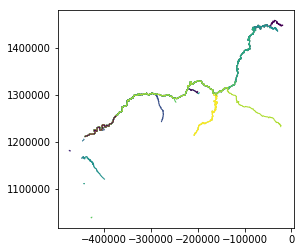

In [33]:
kuskpath.plot()

In [26]:
%%time
yuk = pyriv.river_distances(yuk3338fn, gb.graph)

CPU times: user 4min 16s, sys: 1.94 s, total: 4min 18s
Wall time: 4min 18s


In [40]:
yuk.drop(['path'], axis=1).to_file('data/NatMapOutput/yuk_pnts.shp')

In [48]:
yukpath = yuk.set_geometry('path', drop=True)
yzero_dist = yukpath.riv_dist_km == 0.0
yzero_ind = yukpath.index[yzero_dist]
yukpath.drop(yzero_ind).to_file('data/NatMapOutput/yuk_paths.shp')

In [49]:
yzero_ind

Int64Index([14, 15, 16, 29, 40, 41, 73, 74, 91, 118, 124], dtype='int64')